In [374]:
import numpy as np 
import pandas as pd 
import re
import nltk 
import matplotlib.pyplot as plt
import urllib
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score

Getting info from webiste: https://docs.python.org/3/library/urllib.request.html#urllib.request.urlopen

In [375]:
#data_source_url = "https://raw.githubusercontent.com/kolaveridi/kaggle-Twitter-US-Airline-Sentiment-/master/Tweets.csv"
company_review = pd.read_csv(".\hackgt20_data.csv", encoding='windows-1252')
company_review.head()

,Company,Sentiment,Text
0,Google,Positive,Will not share Your Customer Data or any Third...
1,Google,Negative,"You will indemnify, defend, and hold harmless ..."
2,Google,Positive,Changes will not apply retroactively and will ...
3,Google,Negative,GOOGLE'S TOTAL CUMULATIVE LIABILITY TO YOU OR ...
4,Google,Positive,will not share Your Customer Data or any Third...


8.0
6.0


<AxesSubplot:ylabel='Company'>

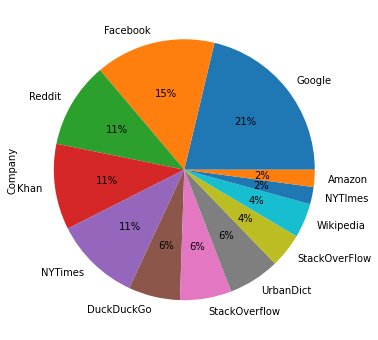

In [376]:
plot_size = plt.rcParams["figure.figsize"] 
print(plot_size[0]) 
print(plot_size[1])

plot_size[0] = 8
plot_size[1] = 6
plt.rcParams["figure.figsize"] = plot_size 
company_review.Company.value_counts().plot(kind='pie', autopct='%1.0f%%')

<AxesSubplot:ylabel='Sentiment'>

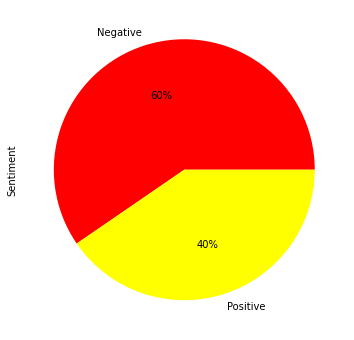

In [387]:
company_review.Sentiment.value_counts().plot(kind='pie', autopct='%1.0f%%', colors=["red", "yellow", "green"])

<AxesSubplot:xlabel='Company'>

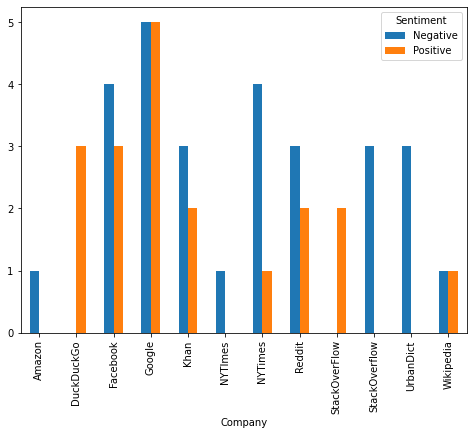

In [388]:
company_sentiment = company_review.groupby(['Company', 'Sentiment']).Sentiment.count().unstack()
company_sentiment.plot(kind='bar')

In [389]:
features = company_review.iloc[:, 2].values
labels = company_review.iloc[:, 1].values
processed_features = []

for sentence in range(0, len(features)):
    # Remove all the special characters
    processed_feature = re.sub(r'\W', ' ', str(features[sentence]))

    # remove all single characters
    processed_feature= re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_feature)

    # Remove single characters from the start
    processed_feature = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_feature) 

    # Substituting multiple spaces with single space
    processed_feature = re.sub(r'\s+', ' ', processed_feature, flags=re.I)

    # Removing prefixed 'b'
    processed_feature = re.sub(r'^b\s+', '', processed_feature)

    # Converting to Lowercase
    processed_feature = processed_feature.lower()

    processed_features.append(processed_feature)

In [390]:
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

vectorizer = TfidfVectorizer (max_features=100, min_df=5, max_df=0.7, stop_words=stopwords.words('english'))
processed_features = vectorizer.fit_transform(processed_features).toarray()
X_train, X_test, y_train, y_test = train_test_split(processed_features, labels, test_size=0.2, random_state=0)
print(X_test)

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.72217681 0.         0.         0.
  0.69170851 0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.        ]
 [0.         0.         0.         0.71699491 0.3954395  0.
  0.         0.         0.17924873 0.         0.17924873 0.
  0.51505892 0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         1.
  0.         0.         0.        ]
 [0.49037372 0.         0.         0.         0.         0.
  0.56694889 0.         0.         0.         0.         0.49037372
  0.         0.         0.44456291]
 [0.         0.         0.86575232 0.         0.        

In [391]:
# this uses Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

text_classifier = RandomForestClassifier(n_estimators=200, random_state=0)
text_classifier.fit(X_train, y_train)
predictions_RFC = text_classifier.predict(X_test)

print("Confusion matrix: \n", confusion_matrix(y_test,predictions_RFC))
print("Classification report: \n", classification_report(y_test,predictions_RFC))
print("Random Forest Classifier Accuracy Score -> ", accuracy_score(y_test, predictions_RFC)*100)

Confusion matrix: 
 [[5 2]
 [2 1]]
Classification report: 
               precision    recall  f1-score   support

    Negative       0.71      0.71      0.71         7
    Positive       0.33      0.33      0.33         3

    accuracy                           0.60        10
   macro avg       0.52      0.52      0.52        10
weighted avg       0.60      0.60      0.60        10

Random Forest Classifier Accuracy Score ->  60.0


In [392]:
# this uses Support Vector Machine
# Classifier - Algorithm - SVM
# fit the training dataset on the classifier
SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM.fit(X_train,y_train)

# predict the labels on validation dataset
predictions_SVM = SVM.predict(X_test)

# Use accuracy_score function to get the accuracy
print("Confusion matrix: \n", confusion_matrix(y_test,predictions_SVM))
print("Classification report: \n", classification_report(y_test,predictions_SVM))
print("SVM Accuracy Score -> ",accuracy_score(predictions_SVM, y_test)*100)

Confusion matrix: 
 [[7 0]
 [3 0]]
Classification report: 
               precision    recall  f1-score   support

    Negative       0.70      1.00      0.82         7
    Positive       0.00      0.00      0.00         3

    accuracy                           0.70        10
   macro avg       0.35      0.50      0.41        10
weighted avg       0.49      0.70      0.58        10

SVM Accuracy Score ->  70.0


c:\users\rgp32\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [393]:
# fit the training dataset on the NB classifier
Naive = naive_bayes.MultinomialNB()
Naive.fit(X_train,y_train)
# predict the labels on validation dataset
predictions_NB = Naive.predict(X_test)
# Use accuracy_score function to get the accuracy
print("Confusion matrix: \n", confusion_matrix(y_test,predictions_NB))
print("Classification report: \n", classification_report(y_test,predictions_NB))
print("Naive Bayes Accuracy Score -> ",accuracy_score(predictions_NB, y_test)*100)

Confusion matrix: 
 [[7 0]
 [3 0]]
Classification report: 
               precision    recall  f1-score   support

    Negative       0.70      1.00      0.82         7
    Positive       0.00      0.00      0.00         3

    accuracy                           0.70        10
   macro avg       0.35      0.50      0.41        10
weighted avg       0.49      0.70      0.58        10

Naive Bayes Accuracy Score ->  70.0


c:\users\rgp32\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [394]:
s = """Please read these Public Network Terms carefully before accessing or using the public Network. These Public Network Terms constitute an agreement between Stack Overflow and you and governs your permitted use of the public Network ONLY, including any Services or Products that are part of the public Network. By accessing or using the Services or the public Network in any manner, including without limitation by visiting or browsing the public Network or registering for an account on the Network, you affirm that you have read, understand, and agree to be bound by these Public Network Terms, as well as the Acceptable Use Policy and Privacy Policy. Stack Overflow reserves the right, at its discretion, to modify these Public Network Terms at any time by posting revised Public Network Terms on the public Network and by providing notice via e-mail, where possible, or on the public Network. You shall be responsible for reviewing and becoming familiar with any such modifications. Your access to or use of the Services or public Network following such modification constitutes your acceptance of the terms and conditions of these Public Network Terms as modified. To reiterate, and for clarity, these Public Network Terms apply to all who access or use the Services or public Network, including without limitation users who contribute content, information, and other materials or services, registered or otherwise.

PLEASE BE AWARE THAT BY USING THE PUBLIC NETWORK, EXCEPT FOR CERTAIN TYPES OF DISPUTES DESCRIBED IN THE SECTION TITLED “MANDATORY ARBITRATION” BELOW, YOU AGREE THAT ALL DISPUTES BETWEEN YOU AND US WILL BE RESOLVED BY BINDING, INDIVIDUAL ARBITRATION AND YOU WAIVE YOUR RIGHT TO PARTICIPATE IN A CLASS ACTION LAWSUIT OR CLASS-WIDE ARBITRATION."""


In [385]:
# Replace newlines with spaces
s = s.replace('\n', ' ')
# Replace tabs with spaces
s = s.replace('\t', ' ')
# Replace returns with spaces
s = s.replace('\r', ' ')
# Replace multiple spaces in a row with one space
s = re.sub(' +', ' ', s)
# Remove leading and trailing whitespace
s = s.strip()
# Split into list of strings on periods, but keep in the periods.
list_of_strings = re.findall('[^\.]+\.', s)
print(list_of_strings)

['Please read these Public Network Terms carefully before accessing or using the public Network.', ' These Public Network Terms constitute an agreement between Stack Overflow and you and governs your permitted use of the public Network ONLY, including any Services or Products that are part of the public Network.', ' By accessing or using the Services or the public Network in any manner, including without limitation by visiting or browsing the public Network or registering for an account on the Network, you affirm that you have read, understand, and agree to be bound by these Public Network Terms, as well as the Acceptable Use Policy and Privacy Policy.', ' Stack Overflow reserves the right, at its discretion, to modify these Public Network Terms at any time by posting revised Public Network Terms on the public Network and by providing notice via e-mail, where possible, or on the public Network.', ' You shall be responsible for reviewing and becoming familiar with any such modifications

In [ ]:
text_classifier = RandomForestClassifier(n_estimators=200, random_state=0)
text_classifier.fit(X_train, y_train)
predictions_RFC = text_classifier.predict(X_test)

print("Confusion matrix: \n", confusion_matrix(y_test,predictions_RFC))
print("Classification report: \n", classification_report(y_test,predictions_RFC))
print("Random Forest Classifier Accuracy Score -> ", accuracy_score(y_test, predictions_RFC)*100)